# Ensemble Lab on Diabetes Prediction

#### Thanks for all the learnings, key learnings include:

1. Accuracy is not always the end goal - what we optimize depends largely on business context - e.g. In pharmaceutical situations like these, type 2 error is to be minimized
2. Impact of seed values and hyper parameter tuning on accuracies and results
3. New concepts for the day - GridSearch, SMOTE(for imbalanced)/stratetified sampling
4. Effective EDA can help get half the job done
5. Good naming convention, comments and other coding practices makes life easier later

# Problem Statement

<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [227]:
#Import all the necessary modules

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import random
%matplotlib inline
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
#from imblearn.over_sampling import SMOTE
#from imblearn import under_sampling 
#from imblearn import over_sampling
#from imblearn.over_sampling import SMOTE

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [228]:
 # Read the file and see a few rows
pima_df =pd.DataFrame(pd.read_csv("D:/Dropbox (eClerx Services Ltd.)/Rajneet.Gulair/Desktop/04 eClerx General/Great Learning/04 Ensemble techniques/Lab/Diabetes.csv"))

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [229]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
634,10,92,62,0,0,25.9,0.167,31,0
603,7,150,78,29,126,35.2,0.692,54,1
251,2,129,84,0,0,28.0,0.284,27,0
187,1,128,98,41,58,32.0,1.321,33,1
252,2,90,80,14,55,24.4,0.249,24,0
566,1,99,72,30,18,38.6,0.412,21,0
267,2,128,64,42,0,40.0,1.101,24,0
247,0,165,90,33,680,52.3,0.427,23,0
508,2,84,50,23,76,30.4,0.968,21,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [230]:
pima_df.shape

(768, 9)

In [231]:
pima_df.isna().any().any()

False

In [232]:
pima_df.info()
# pima_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

Replacing 0s
Pregnancies, Glucose, BloodPressure, SkinThickness and Insulin have lowest values at 0
Logically 0 pregnancy is possible, hence we ignore this and treat the rest

In [233]:
pima_df.describe()
# 5 columns that should not have 0 have so

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [234]:
colnames = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in colnames:
    pima_df[col].replace(0,pima_df[col].median(), inplace = True)
    
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [235]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Findings till Q5

1. 0 marked data in Glucose. BloodPressure, SkinThickness and Insulin corrected
2. Average/median BMI of 32 suggests a larger pool is higher from a healthy BMI of 25
3. These women had a lot of children with lower quartile at 1 and upper at 6. Gestational diabetes is common during pregnancy hence 1/4th women having >=6 children is a risk

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

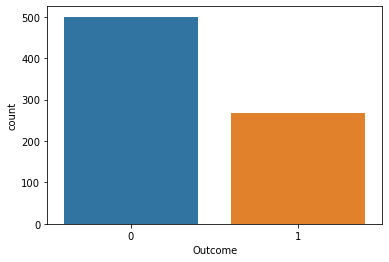

In [236]:
# Distribution of each of the columns.
sns.countplot(x='Outcome',data=pima_df, label = 'Outcome distribution')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

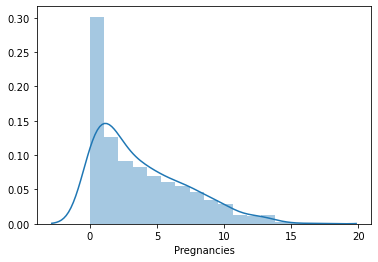

In [237]:
sns.distplot(pima_df['Pregnancies'])

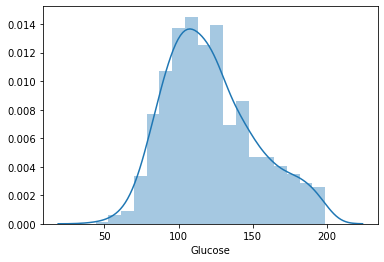

In [238]:
sns.distplot(pima_df['Glucose'])

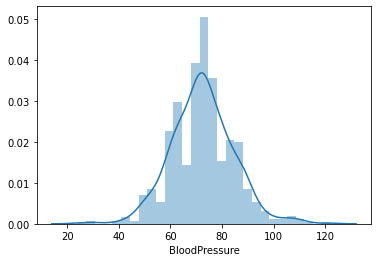

In [239]:
sns.distplot(pima_df['BloodPressure'])

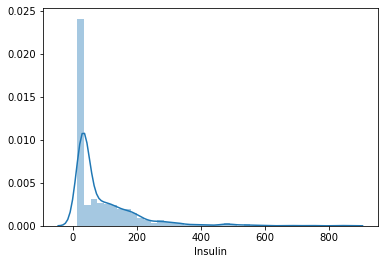

In [240]:
sns.distplot(pima_df['Insulin'])

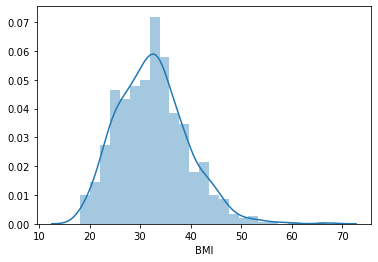

In [241]:
sns.distplot(pima_df['BMI'])

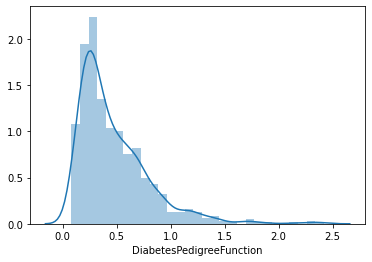

In [242]:
sns.distplot(pima_df['DiabetesPedigreeFunction'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

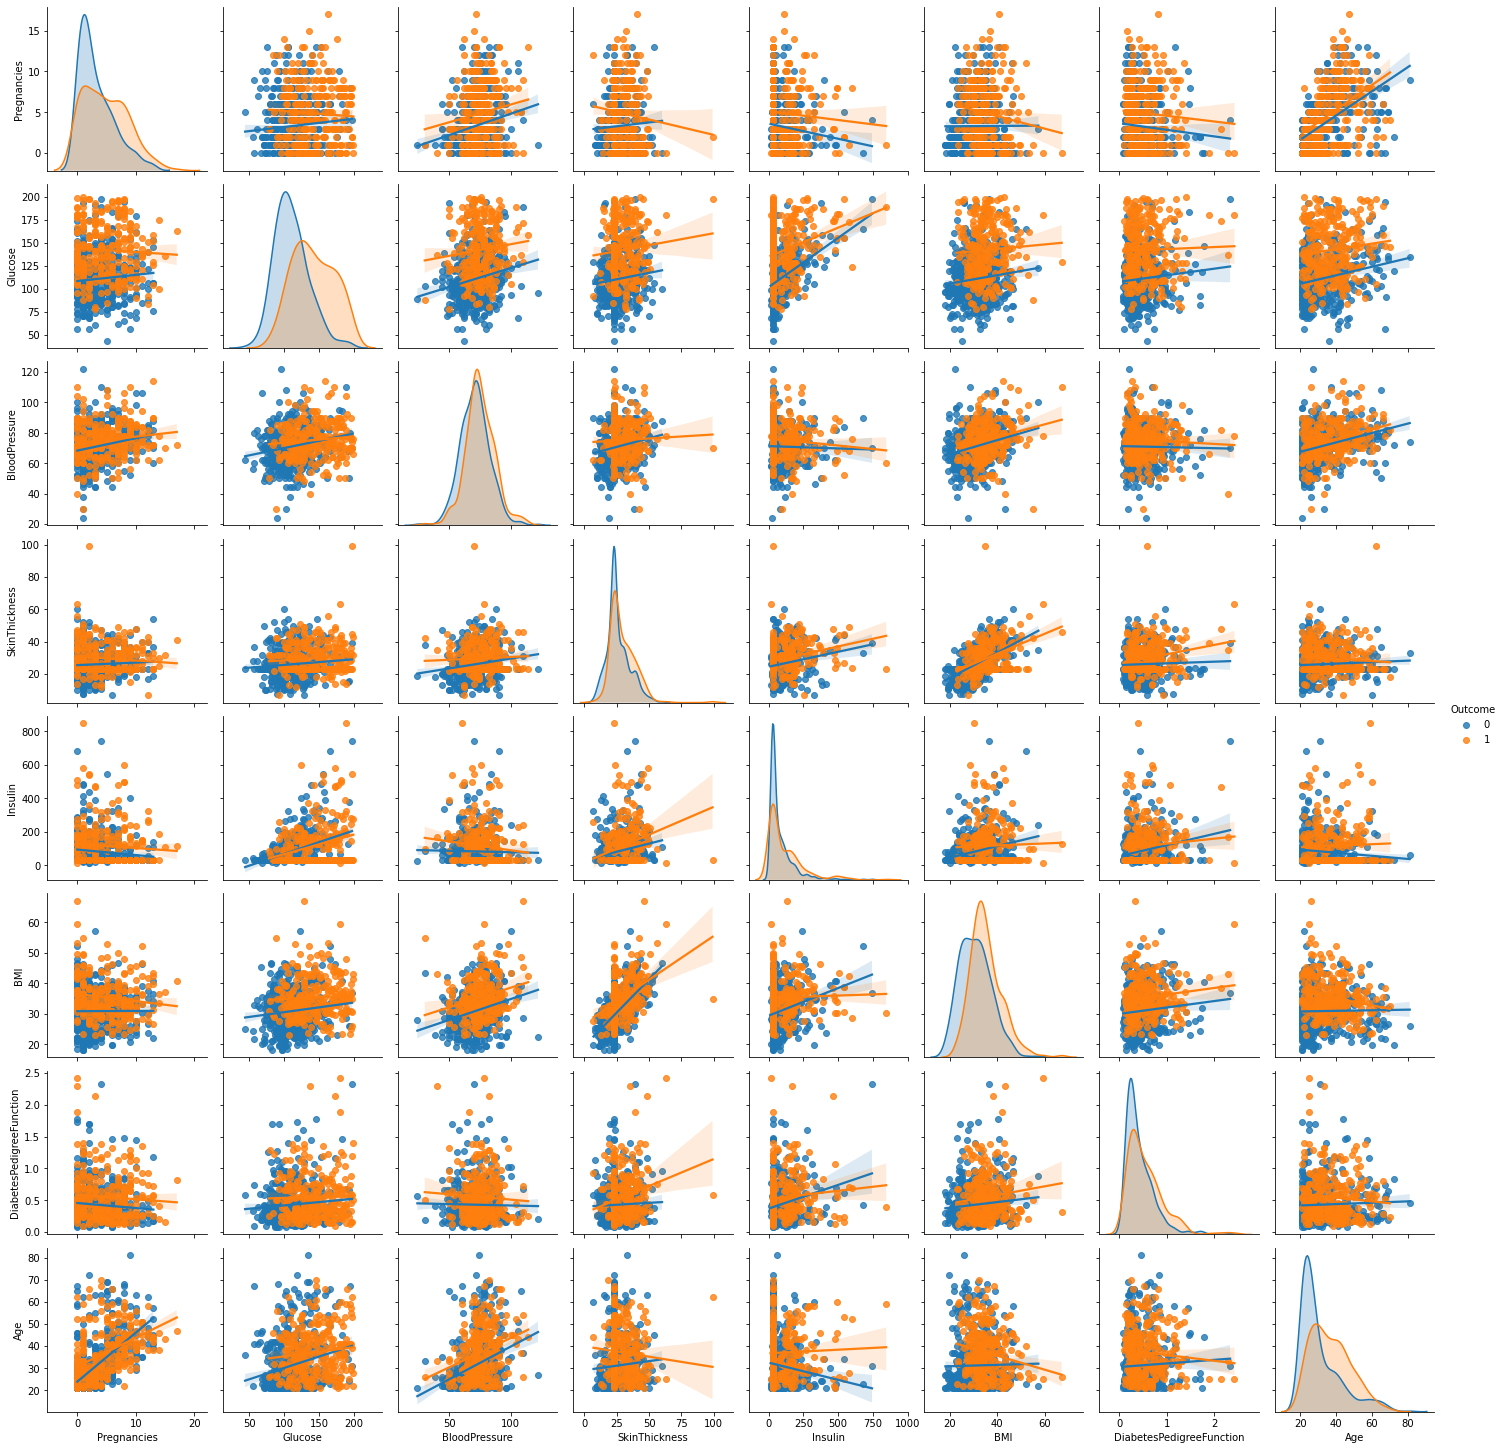

In [243]:
sns.pairplot(pima_df, hue ='Outcome', kind='reg')

In [244]:
pima_df.corr()
#sns.heatmap(pima_df.corr())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


### Findings for Q6-7

1. We are facing a class imbalanced problem with 1 outcome half of 0 outcome
2. Glucose has highest correlation with outcome at ~49%, followede by BMI at ~29%
3. SkinThickness and BMI, pregnancies and age have reasonable (>50%) correlation
4. Pregnancies, DiabetesPedigreeFunction right skewed

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [245]:
# Target value is class
y = pima_df[['Outcome']]

# Feature set is remaining features
X = pima_df.drop('Outcome', axis = 1)

y.head()
X.head()

# No scaling for tree based algorithmns

# Split the data as a train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify = y)

# Show the results of the split
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537, 1) (231, 1)


In [246]:
#smt = SMOTE()
#X_train, y_train = smt.fit_sample(X_train, y_train)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [247]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 2)
dt_model.fit(X_train, y_train)
#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

# gridsearch/randomsearch to optimize
# baseline accuracy of decision tree model will be used for comparison with other models

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2)

In [248]:
#from sklearn import tree
#tree.plot_tree(dt_model.fit(X_train, y_train))

# Q10 Print the accuracy of the model & print the confusion matrix 

In [249]:
dt_y_predict = dt_model.predict(X_test)

print(confusion_matrix(y_test,dt_y_predict))
print(classification_report(y_test,dt_y_predict))

print("The train and test accuracies are {}% and {}%".format(round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)))

[[126  24]
 [ 27  54]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       150
           1       0.69      0.67      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

The train and test accuracies are 84.92% and 77.92%


In [250]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp', ascending = False))

                               Imp
Glucose                   0.392481
BMI                       0.250553
BloodPressure             0.090238
Age                       0.090132
Insulin                   0.069256
DiabetesPedigreeFunction  0.063980
Pregnancies               0.027631
SkinThickness             0.015730


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [251]:
rf_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth=9)
rf_model = rf_model.fit(X_train, y_train)

In [252]:
rf_y_predict = rf_model.predict(X_test)

print(confusion_matrix(y_test,rf_y_predict))
print(classification_report(y_test,rf_y_predict))

print("The train and test accuracies are {}% and {}%".format(round(rf_model.score(X_train, y_train)*100,2), round(rf_model.score(X_test, y_test)*100,2)))

[[127  23]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

The train and test accuracies are 98.32% and 75.32%


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [253]:
ab_model = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
ab_model = ab_model.fit(X_train, y_train)

In [254]:
ab_y_predict = ab_model.predict(X_test)

print(confusion_matrix(y_test,ab_y_predict))
print(classification_report(y_test,ab_y_predict))

print("The train and test accuracies are {}% and {}%".format(round(ab_model.score(X_train, y_train)*100,2), round(ab_model.score(X_test, y_test)*100,2)))

[[130  20]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231

The train and test accuracies are 100.0% and 74.89%


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [255]:
bg_model = BaggingClassifier(n_estimators=100, max_samples=50 , oob_score=True)
bg_model = bg_model.fit(X_train, y_train)

In [256]:
bg_y_predict = bg_model.predict(X_test)

print(confusion_matrix(y_test,bg_y_predict))
print(classification_report(y_test,bg_y_predict))

print("The train and test accuracies are {}% and {}%".format(round(bg_model.score(X_train, y_train)*100,2), round(bg_model.score(X_test, y_test)*100,2)))

[[133  17]
 [ 38  43]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.72      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

The train and test accuracies are 82.12% and 76.19%


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [257]:
gb_model = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gb_model = gb_model.fit(X_train, y_train)

In [258]:
gb_y_predict = gb_model.predict(X_test)

print(confusion_matrix(y_test,gb_y_predict))
print(classification_report(y_test,gb_y_predict))

print("The train and test accuracies are {}% and {}%".format(round(gb_model.score(X_train, y_train)*100,2), round(gb_model.score(X_test, y_test)*100,2)))

[[124  26]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.52      0.56        81

    accuracy                           0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231

The train and test accuracies are 98.51% and 71.86%


### We move ahead with decision tree with its lowest type 2 error, outcome 1 f1 score of 68% and test accuracy of ~78%